## Grid search for hyperparameter tuning
- helps in finding the best combination that yields the highest accuracy.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'gamma': ['scale', 0.01, 0.001], # Kernel coefficient
    'kernel': ['linear', 'rbf']     # Kernel types
}

In [5]:
# Create an SVM model
model = SVC()
 
# Apply Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.01, ...], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [6]:
# Best parameters and best score
print("Best Parameters Found:", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")
 
# Evaluate on the test set using best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
 
# Final evaluation report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Best Parameters Found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.96

Classification Report on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Bayesian optimization for hyperparameters


In [7]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
import warnings

In [8]:
warnings.filterwarnings("ignore")  # To suppress convergence warnings for demo
 
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
# Define the search space for hyperparameters
search_space = {
    'C': Real(0.01, 100.0, prior='log-uniform'),
    'gamma': Real(1e-6, 1.0, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf'])
}

In [10]:
# Create the SVM model
model = SVC()
 

In [11]:
# Set up Bayesian search
opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=30,             # Number of parameter settings to try
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',
    random_state=42
)
 
# Run the optimization
opt.fit(X, y)
 
# Output best parameters and score
print("Best Parameters (Bayesian Optimization):", opt.best_params_)
print(f"Best Cross-Validated Accuracy: {opt.best_score_:.4f}")

Best Parameters (Bayesian Optimization): OrderedDict({'C': 0.6016307829589929, 'gamma': 0.32533825281254897, 'kernel': 'linear'})
Best Cross-Validated Accuracy: 0.9867


## Correlation analysis tool
- builds a simple tool to compute and visualize correlations using Pearson correlation coefficients and a heatmap

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Sample dataset (can also be replaced with any CSV)
data = {
    "Age": [25, 32, 47, 51, 62, 23, 43, 36, 52, 48],
    "Income": [45000, 54000, 72000, 80000, 88000, 43000, 69000, 62000, 85000, 79000],
    "SpendingScore": [30, 40, 50, 60, 65, 25, 45, 42, 58, 62],
    "CreditScore": [650, 680, 720, 700, 710, 640, 690, 685, 705, 695]
}

Correlation Matrix:

                    Age    Income  SpendingScore  CreditScore
Age            1.000000  0.984664       0.962619     0.894368
Income         0.984664  1.000000       0.975591     0.887006
SpendingScore  0.962619  0.975591       1.000000     0.864408
CreditScore    0.894368  0.887006       0.864408     1.000000


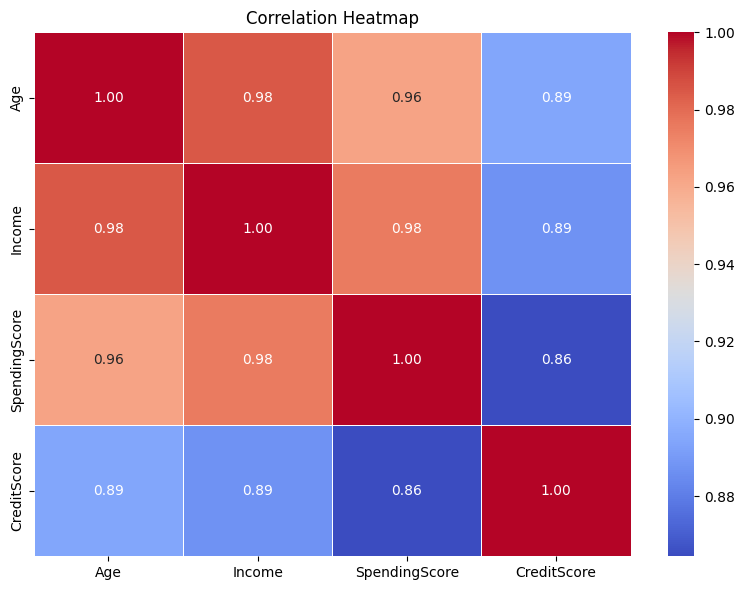

In [14]:
# Convert to DataFrame
df = pd.DataFrame(data)
 
# Calculate the correlation matrix using Pearson method
correlation_matrix = df.corr()
 
# Print correlation matrix
print("Correlation Matrix:\n")
print(correlation_matrix)
 
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## Confusion matrix visualization
- Visualizes results using a heatmap for quick interpretation

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names
 
# Binary classification example: only setosa and versicolor (0 and 1)
X_binary = X[y != 2]
y_binary = y[y != 2]
 
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
 
# Train logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)
 
# Predict on test data
y_pred = model.predict(X_test)

In [17]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual Setosa", "Actual Versicolor"], columns=["Predicted Setosa", "Predicted Versicolor"])
 
# Print matrix
print("Confusion Matrix:\n")
print(cm_df)

Confusion Matrix:

                   Predicted Setosa  Predicted Versicolor
Actual Setosa                    17                     0
Actual Versicolor                 0                    13


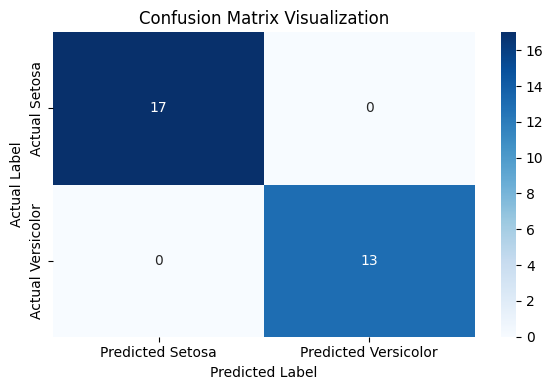

In [18]:
# Visualize with seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Visualization")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

## ROC curve generator
- It plots True Positive Rate (TPR) against False Positive Rate (FPR) and helps assess model quality

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

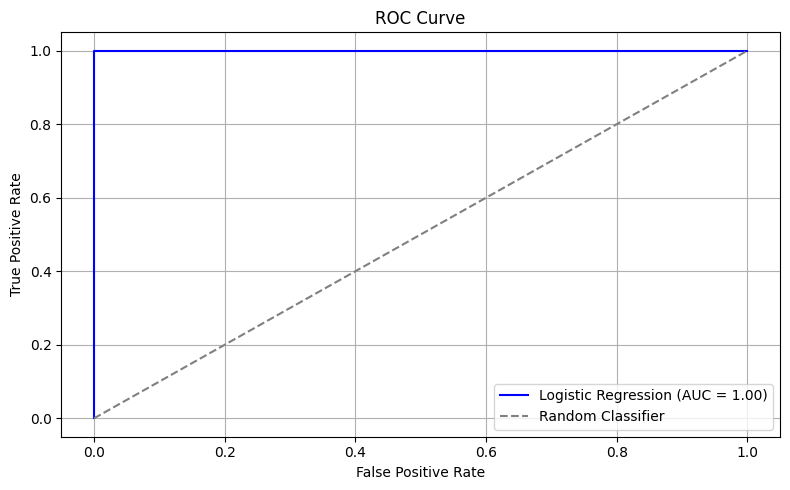

In [20]:
# Load the Iris dataset (only 2 classes: setosa and versicolor for binary classification)
iris = load_iris()
X = iris.data
y = iris.target
 
# Use only class 0 and 1 for binary classification
X_binary = X[y != 2]
y_binary = y[y != 2]
 
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
 
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
 
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
 
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
 
# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Precision-recall curve plotter
- isualize the trade-off between precision (positive predictive value) and recall (true positive rate)

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

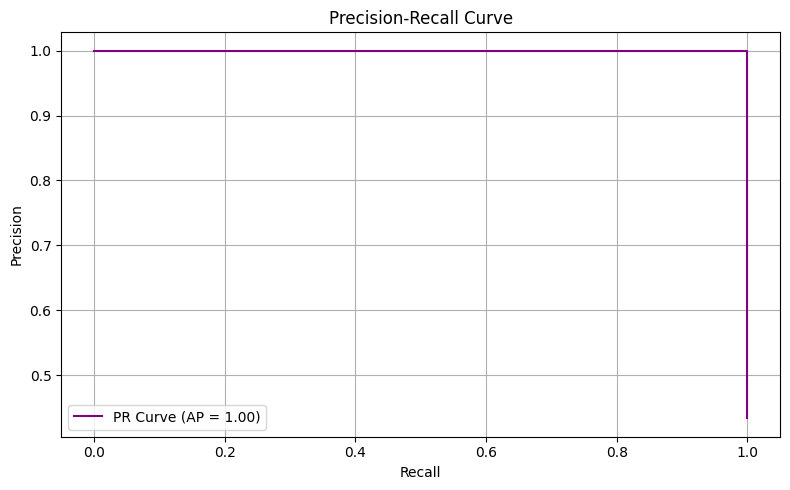

In [22]:
# Load Iris dataset (we'll simplify to binary classification: Setosa vs Versicolor)
iris = load_iris()
X = iris.data
y = iris.target
 
# Keep only Setosa and Versicolor classes (labels 0 and 1)
X_binary = X[y != 2]
y_binary = y[y != 2]
 
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
 
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
 
# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class "1"
 
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)
 
# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='purple', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Learning curve visualizations
- It helps diagnose whether a model suffers from high bias (underfitting) or high variance (overfitting)

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

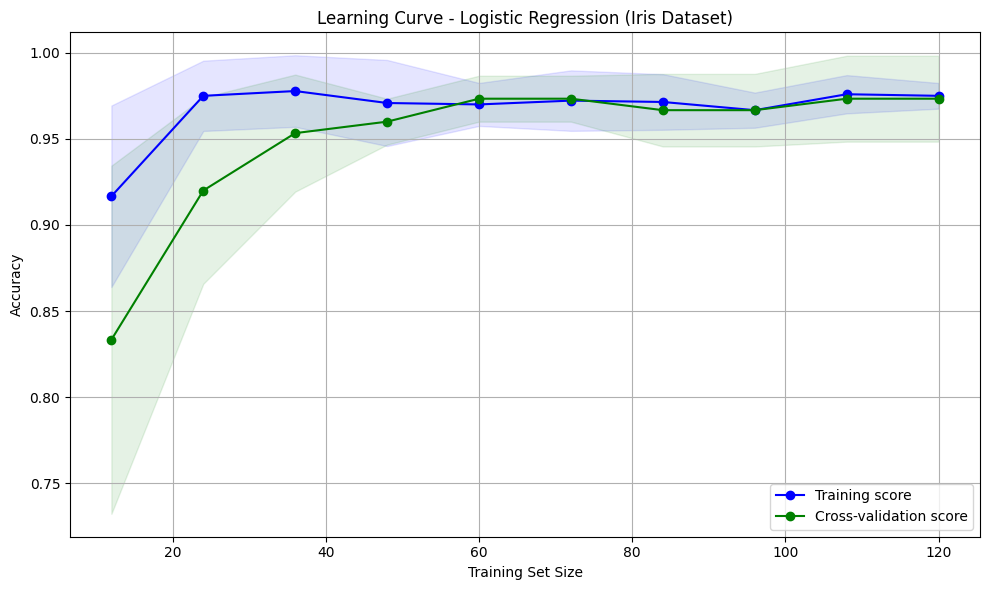

In [24]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Create the model
model = LogisticRegression(max_iter=200)
 
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different sizes from 10% to 100%
    cv=5,                                   # 5-fold cross-validation
    scoring='accuracy',
    shuffle=True,
    random_state=42
)
 
# Calculate mean and std for plotting
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)
 
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
 
# Fill between for std shading
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
 
plt.title("Learning Curve - Logistic Regression (Iris Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

 ## Data normalization techniques
- demonstrate and compare Min-Max Scaling, Z-score Standardization, and Max Abs Scaling using a synthetic dataset.

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [26]:
# Create a sample dataset with varying scales
data = {
    'Feature_1': [100, 200, 300, 400, 500],   # Large range
    'Feature_2': [1, 2, 3, 4, 5],             # Small range
    'Feature_3': [-50, -25, 0, 25, 50]        # Negative to positive
}
 
df = pd.DataFrame(data)
print("Original Data:\n", df)
 
# ---- Min-Max Scaling ----
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
print("\nMin-Max Scaled Data:\n", df_minmax)
 
# ---- Z-score Standardization ----
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print("\nZ-Score Standardized Data:\n", df_standard)
 
# ---- Max-Abs Scaling ----
maxabs_scaler = MaxAbsScaler()
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df), columns=df.columns)
print("\nMax-Abs Scaled Data:\n", df_maxabs)

Original Data:
    Feature_1  Feature_2  Feature_3
0        100          1        -50
1        200          2        -25
2        300          3          0
3        400          4         25
4        500          5         50

Min-Max Scaled Data:
    Feature_1  Feature_2  Feature_3
0       0.00       0.00       0.00
1       0.25       0.25       0.25
2       0.50       0.50       0.50
3       0.75       0.75       0.75
4       1.00       1.00       1.00

Z-Score Standardized Data:
    Feature_1  Feature_2  Feature_3
0  -1.414214  -1.414214  -1.414214
1  -0.707107  -0.707107  -0.707107
2   0.000000   0.000000   0.000000
3   0.707107   0.707107   0.707107
4   1.414214   1.414214   1.414214

Max-Abs Scaled Data:
    Feature_1  Feature_2  Feature_3
0        0.2        0.2       -1.0
1        0.4        0.4       -0.5
2        0.6        0.6        0.0
3        0.8        0.8        0.5
4        1.0        1.0        1.0


 ## Feature engineering toolkit
- build a toolkit

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, Binarizer, KBinsDiscretizer, LabelEncoder

In [28]:
# Sample dataset
data = {
    'Age': [22, 25, 47, 52, 46],
    'Salary': [25000, 30000, 52000, 70000, 62000],
    'Purchased': ['No', 'Yes', 'Yes', 'No', 'Yes']  # Categorical label
}
df = pd.DataFrame(data)
print("Original Data:\n", df)
 
# ---- 1. Polynomial Features ----
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'Salary']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Age', 'Salary']))
print("\nPolynomial Features (Degree 2):\n", poly_df)
 
# ---- 2. Binarization ----
binarizer = Binarizer(threshold=50000)
binarized_salary = binarizer.fit_transform(df[['Salary']])
df['High_Salary'] = binarized_salary
print("\nBinarized 'Salary' (1 if > 50,000):\n", df[['Salary', 'High_Salary']])
 
# ---- 3. Discretization (Bucketing Age) ----
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['Age_Bin'] = discretizer.fit_transform(df[['Age']])
print("\nDiscretized 'Age' into 3 bins:\n", df[['Age', 'Age_Bin']])
 
# ---- 4. Label Encoding ----
label_encoder = LabelEncoder()
df['Purchased_Encoded'] = label_encoder.fit_transform(df['Purchased'])
print("\nLabel Encoded 'Purchased':\n", df[['Purchased', 'Purchased_Encoded']])

Original Data:
    Age  Salary Purchased
0   22   25000        No
1   25   30000       Yes
2   47   52000       Yes
3   52   70000        No
4   46   62000       Yes

Polynomial Features (Degree 2):
     Age   Salary   Age^2  Age Salary      Salary^2
0  22.0  25000.0   484.0    550000.0  6.250000e+08
1  25.0  30000.0   625.0    750000.0  9.000000e+08
2  47.0  52000.0  2209.0   2444000.0  2.704000e+09
3  52.0  70000.0  2704.0   3640000.0  4.900000e+09
4  46.0  62000.0  2116.0   2852000.0  3.844000e+09

Binarized 'Salary' (1 if > 50,000):
    Salary  High_Salary
0   25000            0
1   30000            0
2   52000            1
3   70000            1
4   62000            1

Discretized 'Age' into 3 bins:
    Age  Age_Bin
0   22      0.0
1   25      0.0
2   47      2.0
3   52      2.0
4   46      2.0

Label Encoded 'Purchased':
   Purchased  Purchased_Encoded
0        No                  0
1       Yes                  1
2       Yes                  1
3        No                  0
4    

##  Time series forecasting with ARIMA
- Simulates a real-world trend with seasonal noise

- Builds an ARIMA(1,1,1) model for forecasting

- Compares predicted vs. actual values and evaluates using MSE

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

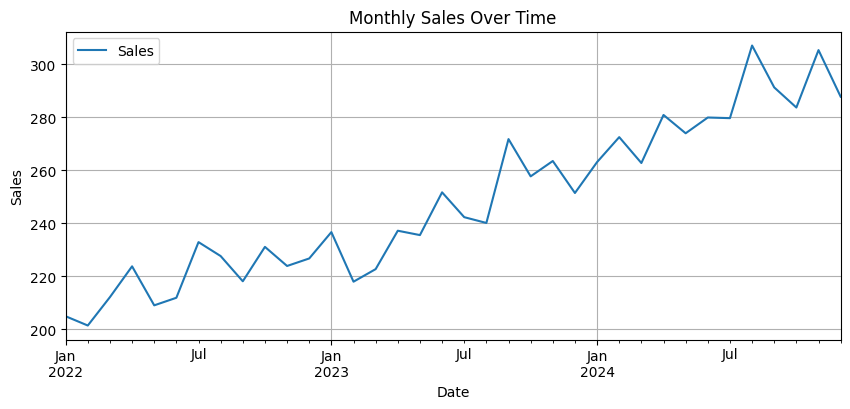

In [34]:
# Generate a simple synthetic time series (e.g., monthly sales data)
np.random.seed(42)
months = pd.date_range(start="2022-01", periods=36, freq="M")
sales = np.linspace(200, 300, 36) + np.random.normal(scale=10, size=36)  # upward trend + noise
df = pd.DataFrame({"Date": months, "Sales": sales}).set_index("Date")
 
# Plot original data
df.plot(title="Monthly Sales Over Time", figsize=(10, 4))
plt.ylabel("Sales")
plt.grid(True)
plt.show()
 


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


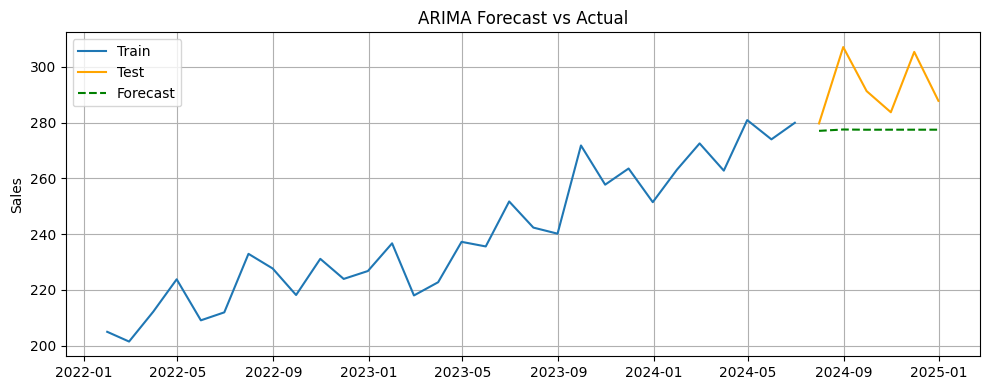


Forecasted Values:
 Date
2024-07-31    277.039911
2024-08-31    277.524979
2024-09-30    277.443852
2024-10-31    277.457421
2024-11-30    277.455151
2024-12-31    277.455531
Name: predicted_mean, dtype: float64

Mean Squared Error (MSE): 333.0452237721392


In [33]:
# Split data into train and test
train = df.iloc[:-6]
test = df.iloc[-6:]
 
# Fit ARIMA model (order = (p,d,q))
model = ARIMA(train, order=(1,1,1))  # ARIMA(1,1,1) = AR + Differencing + MA
model_fit = model.fit()
 
# Forecast the next 6 periods (same as test set)
forecast = model_fit.forecast(steps=6)
forecast = pd.Series(forecast, index=test.index)
 
# Plot forecast vs actual
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title("ARIMA Forecast vs Actual")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
 
# Print forecast and evaluate
print("\nForecasted Values:\n", forecast)
print("\nMean Squared Error (MSE):", mean_squared_error(test, forecast))

## Simple genetic algorithm
- Maximizes the function f(x) = x * sin(x) over the interval [0, 10]

- Evolves a population over multiple generations

- Applies selection, crossover, and mutation

- Tracks and prints the best solution each generation

In [35]:
import numpy as np

In [36]:
# Objective function: Maximize f(x) = x * sin(x)
def fitness_function(x):
    return x * np.sin(x)
 
# Parameters
population_size = 10
generations = 30
mutation_rate = 0.1
x_bounds = (0, 10)
 
# Generate initial population (random real values)
population = np.random.uniform(low=x_bounds[0], high=x_bounds[1], size=(population_size,))
 
# Genetic Algorithm loop
for generation in range(generations):
    # Evaluate fitness for each individual
    fitness = fitness_function(population)
 
    # Select the top 50% of the population (tournament selection)
    sorted_indices = np.argsort(fitness)[::-1]
    parents = population[sorted_indices[:population_size // 2]]
 
    # Crossover (simple average crossover)
    offspring = []
    while len(offspring) < population_size // 2:
        p1, p2 = np.random.choice(parents, 2, replace=False)
        child = (p1 + p2) / 2
        offspring.append(child)
 
    # Mutation: randomly modify some offspring
    for i in range(len(offspring)):
        if np.random.rand() < mutation_rate:
            offspring[i] += np.random.normal(0, 0.5)  # small random noise
            offspring[i] = np.clip(offspring[i], *x_bounds)
 
    # Form new generation
    population = np.concatenate([parents, offspring])
 
    # Print the best solution so far
    best_fitness = np.max(fitness_function(population))
    best_individual = population[np.argmax(fitness_function(population))]
    print(f"Generation {generation+1}: Best x = {best_individual:.4f}, f(x) = {best_fitness:.4f}")
 
# Final result
print("\nFinal Best Solution:")
print(f"  x = {best_individual:.4f}")
print(f"  f(x) = {best_fitness:.4f}")

Generation 1: Best x = 7.8016, f(x) = 7.7910
Generation 2: Best x = 7.8016, f(x) = 7.7910
Generation 3: Best x = 7.9552, f(x) = 7.9145
Generation 4: Best x = 7.9552, f(x) = 7.9145
Generation 5: Best x = 7.9606, f(x) = 7.9154
Generation 6: Best x = 7.9829, f(x) = 7.9167
Generation 7: Best x = 7.9829, f(x) = 7.9167
Generation 8: Best x = 7.9780, f(x) = 7.9167
Generation 9: Best x = 7.9780, f(x) = 7.9167
Generation 10: Best x = 7.9790, f(x) = 7.9167
Generation 11: Best x = 7.9786, f(x) = 7.9167
Generation 12: Best x = 7.9787, f(x) = 7.9167
Generation 13: Best x = 7.9787, f(x) = 7.9167
Generation 14: Best x = 7.9787, f(x) = 7.9167
Generation 15: Best x = 7.9787, f(x) = 7.9167
Generation 16: Best x = 7.9787, f(x) = 7.9167
Generation 17: Best x = 7.9787, f(x) = 7.9167
Generation 18: Best x = 7.9787, f(x) = 7.9167
Generation 19: Best x = 7.9787, f(x) = 7.9167
Generation 20: Best x = 7.9787, f(x) = 7.9167
Generation 21: Best x = 7.9787, f(x) = 7.9167
Generation 22: Best x = 7.9787, f(x) = 7.91

##  Hierarchical clustering implementation

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

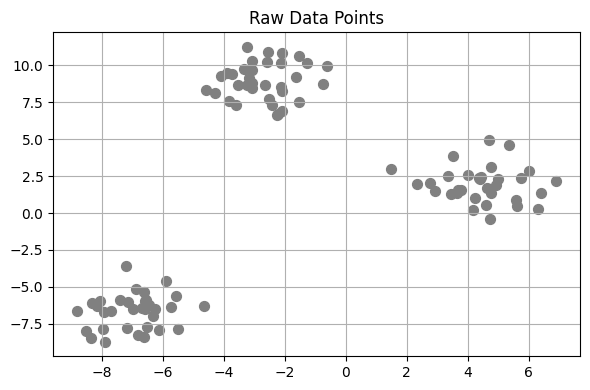

In [42]:
# Generate synthetic 2D data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=42)
 
# Plot the raw data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray')
plt.title("Raw Data Points")
plt.grid(True)
plt.tight_layout()
plt.show()

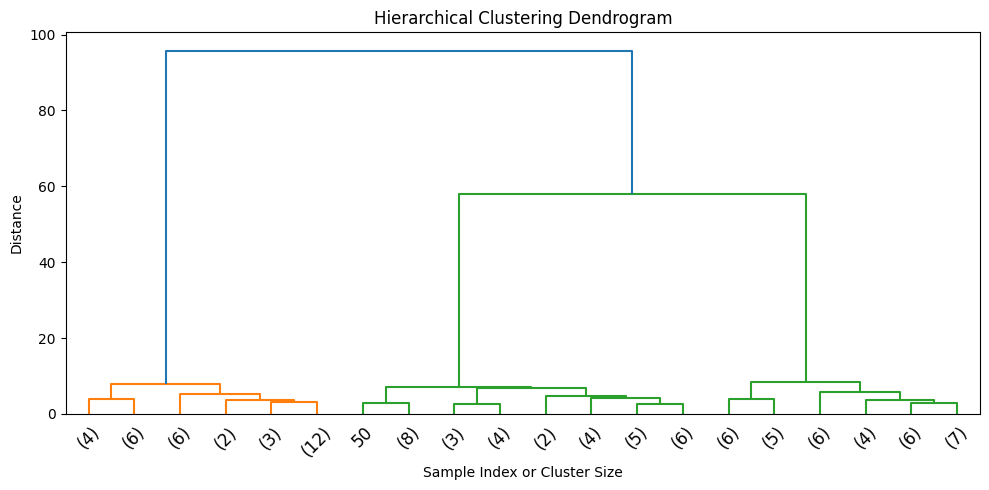

In [40]:
# ---- 1. Create Dendrogram ----
linked = linkage(X, method='ward')  # 'ward' minimizes variance within clusters
 
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

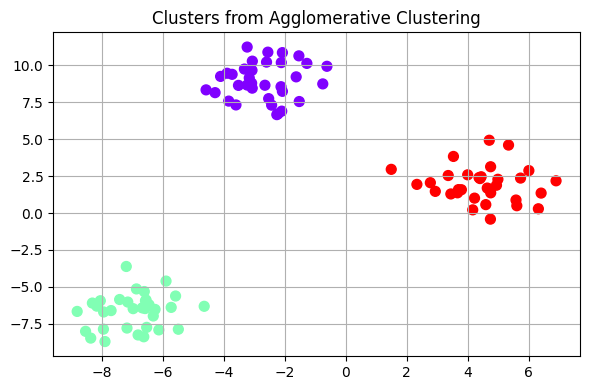

In [41]:
# ---- 2. Apply Agglomerative Clustering ----
# Removed 'affinity' parameter which was causing the error
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X)
 
# Plot clustered data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Clusters from Agglomerative Clustering")
plt.grid(True)
plt.tight_layout()
plt.show()

## DBSCAN clustering implementation
- Clusters moon-shaped data using DBSCAN, unlike K-Means which fails on non-linear structures.

- Automatically detects clusters and outliers.

- Labels outliers as -1 (shown as "Noise").

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

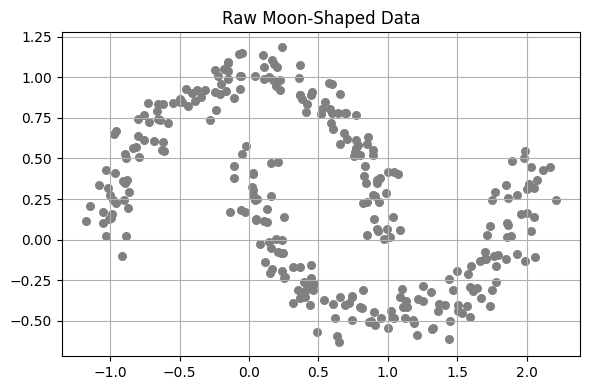

In [44]:
# Generate a synthetic dataset with non-linear (moon-shaped) clusters
X, _ = make_moons(n_samples=300, noise=0.08, random_state=42)
 
# Visualize raw data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=30, color='gray')
plt.title("Raw Moon-Shaped Data")
plt.grid(True)
plt.tight_layout()
plt.show()

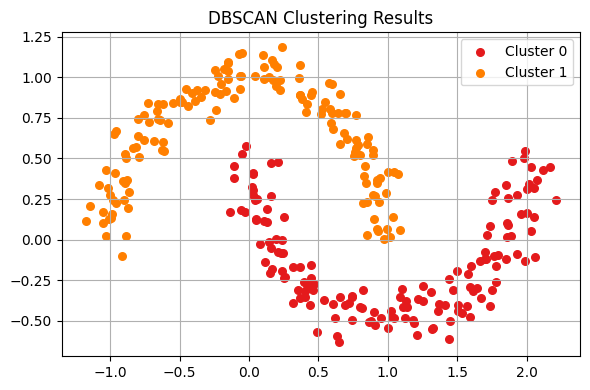

In [45]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps = neighborhood radius, min_samples = density threshold
labels = dbscan.fit_predict(X)
 
# Plot DBSCAN results
plt.figure(figsize=(6, 4))
unique_labels = set(labels)
colors = [plt.cm.Set1(i / float(len(unique_labels))) for i in unique_labels]
 
for label, color in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], s=30, label=f'Cluster {label}' if label != -1 else 'Noise', color=color)
 
plt.title("DBSCAN Clustering Results")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 ## Ensemble methods implementation
- Random Forest: Aggregates many decision trees (bagging).

- Gradient Boosting: Builds trees sequentially to correct errors (boosting).

- Voting Classifier: Combines predictions from multiple different models.

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [47]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# ---- 1. Bagging: Random Forest ----
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.2f}")

Random Forest Accuracy: 1.00


In [48]:
# ---- 2. Boosting: Gradient Boosting ----
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_preds):.2f}")

Gradient Boosting Accuracy: 1.00


In [49]:
# ---- 3. Voting Classifier (Hard Voting) ----
log_clf = LogisticRegression(max_iter=200)
svc_clf = SVC(probability=True)  # Enable probability for soft voting
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf), ('svc', svc_clf), ('rf', rf)
], voting='hard')
 
voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_preds):.2f}")

Voting Classifier Accuracy: 1.00


## Bootstrap aggregating (bagging) implementation
- Applies bootstrapping to create multiple training subsets

- Trains base learners (Decision Trees) on these subsets

- Aggregates predictions (majority vote for classification)

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [54]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Create a base model: Decision Tree
base_model = DecisionTreeClassifier()
 
# Create BaggingClassifier with multiple trees trained on bootstrapped samples
bagging_model = BaggingClassifier(
    estimator=base_model,      # Changed from base_estimator to estimator
    n_estimators=50,           # Number of trees
    max_samples=0.8,           # Fraction of dataset for each tree
    bootstrap=True,            # Use bootstrapped sampling
    random_state=42
)
 
# Train the bagging model
bagging_model.fit(X_train, y_train)
 
# Make predictions
y_pred = bagging_model.predict(X_test)
 
# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging (Bootstrap Aggregation) Accuracy: {accuracy:.2f}")
 
# Optional: Visualize individual tree predictions (for the curious)
print("\nPredictions from first 5 individual estimators:")
for i, estimator in enumerate(bagging_model.estimators_[:5]):
    print(f"Tree {i+1} predictions: {estimator.predict(X_test)}")

Bagging (Bootstrap Aggregation) Accuracy: 1.00

Predictions from first 5 individual estimators:
Tree 1 predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Tree 2 predictions: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Tree 3 predictions: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Tree 4 predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Tree 5 predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


## AdaBoost algorithm implementation
- Builds multiple weak learners (decision stumps)

- Adjusts focus toward misclassified samples at each round

- Produces a strong classifier through adaptive boosting

In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [56]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Use only two classes for binary classification (Setosa vs Versicolor)
X_binary = X[y != 2]
y_binary = y[y != 2]
 
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
 
# Create base estimator (shallow decision tree)
base_estimator = DecisionTreeClassifier(max_depth=1)
 
# Initialize AdaBoost with base estimator
ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
 
# Train the model
ada_model.fit(X_train, y_train)
 
# Make predictions
y_pred = ada_model.predict(X_test)
 
# Evaluate the model
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names[:2]))

AdaBoost Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##  A/B testing framework
- Simulates conversion data

- Applies both T-Test and Z-Test for proportions

- Calculates and interprets p-values, conversion lift, and significance

- Visualizes the results

In [58]:
import numpy as np
from scipy.stats import ttest_ind, norm
import matplotlib.pyplot as plt

In [59]:
# Simulate user conversion data for two versions of a web page
np.random.seed(42)
 
# Group A (Control): 1000 users, 12% conversion rate
group_a = np.random.binomial(1, 0.12, 1000)
 
# Group B (Variant): 1000 users, 15% conversion rate
group_b = np.random.binomial(1, 0.15, 1000)
 
# Calculate basic statistics
conv_rate_a = np.mean(group_a)
conv_rate_b = np.mean(group_b)
 
print(f"Conversion Rate A (Control): {conv_rate_a:.3f}")
print(f"Conversion Rate B (Variant): {conv_rate_b:.3f}")
print(f"Lift: {(conv_rate_b - conv_rate_a) / conv_rate_a * 100:.2f}%")

Conversion Rate A (Control): 0.124
Conversion Rate B (Variant): 0.152
Lift: 22.58%



T-Test p-value: 0.0695
Z-Test z-score: 1.82
Z-Test one-tailed p-value: 0.0347


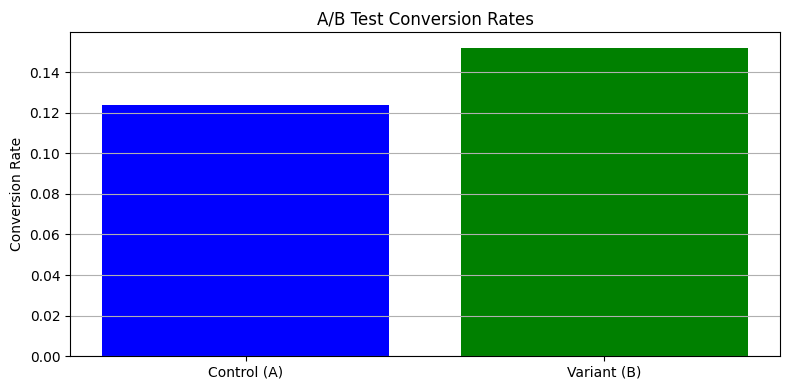

In [60]:
# ---- Option 1: T-Test (for normally distributed metrics like revenue/time) ----
t_stat, p_value_t = ttest_ind(group_a, group_b)
print(f"\nT-Test p-value: {p_value_t:.4f}")
 
# ---- Option 2: Z-Test for Proportions ----
n_a, n_b = len(group_a), len(group_b)
success_a, success_b = sum(group_a), sum(group_b)
 
# Pooled probability
p_pool = (success_a + success_b) / (n_a + n_b)
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_a + 1/n_b))
z = (conv_rate_b - conv_rate_a) / se
p_value_z = 1 - norm.cdf(z)
 
print(f"Z-Test z-score: {z:.2f}")
print(f"Z-Test one-tailed p-value: {p_value_z:.4f}")
 
# Plot distributions
plt.figure(figsize=(8, 4))
plt.bar(["Control (A)", "Variant (B)"], [conv_rate_a, conv_rate_b], color=["blue", "green"])
plt.title("A/B Test Conversion Rates")
plt.ylabel("Conversion Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Multi-armed bandit implementation
- Simulates multiple slot machines (arms)

- Uses the ε-greedy strategy to balance exploration and exploitation

- Updates reward estimates incrementally

- Tracks total reward and arm pulls

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Simulated slot machines with different true success probabilities
true_conversion_rates = [0.2, 0.5, 0.75]
n_arms = len(true_conversion_rates)
n_rounds = 1000
epsilon = 0.1  # Exploration probability
 
# Initialize counts and estimated rewards
counts = np.zeros(n_arms)           # How many times each arm has been pulled
estimated_rewards = np.zeros(n_arms)  # Estimated value of each arm
total_reward = 0
reward_history = []
 
# ε-greedy algorithm loop
for t in range(n_rounds):
    # Exploration vs. Exploitation
    if np.random.rand() < epsilon:
        chosen_arm = np.random.randint(n_arms)  # Explore
    else:
        chosen_arm = np.argmax(estimated_rewards)  # Exploit best so far
 
    # Simulate pulling the arm
    reward = np.random.binomial(1, true_conversion_rates[chosen_arm])
    counts[chosen_arm] += 1
 
    # Update estimated reward using incremental average
    estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / counts[chosen_arm]
    total_reward += reward
    reward_history.append(total_reward)
 
# Results
print("True Conversion Rates:", true_conversion_rates)
print("Estimated Rewards:", estimated_rewards.round(3))
print("Arm Pull Counts:", counts.astype(int))
print(f"Total Reward Collected: {total_reward}")

True Conversion Rates: [0.2, 0.5, 0.75]
Estimated Rewards: [0.154 0.527 0.756]
Arm Pull Counts: [ 39  55 906]
Total Reward Collected: 720


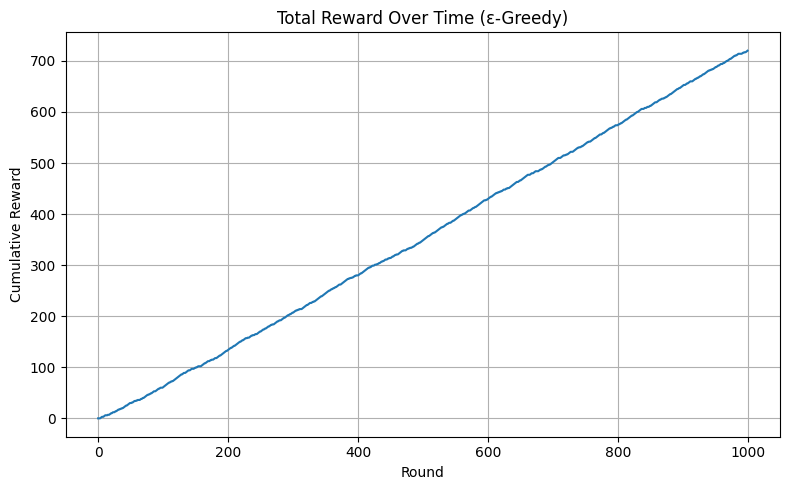

In [63]:
# Plot reward growth
plt.figure(figsize=(8, 5))
plt.plot(reward_history)
plt.title("Total Reward Over Time (ε-Greedy)")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.tight_layout()
plt.show()

## Dimensionality reduction techniques

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

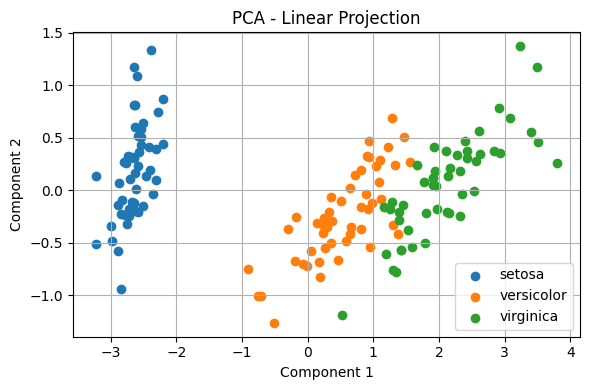

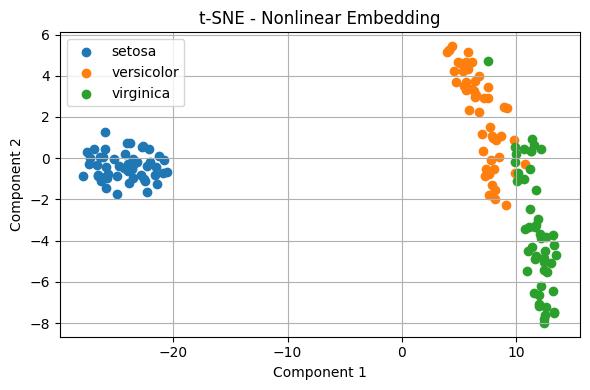

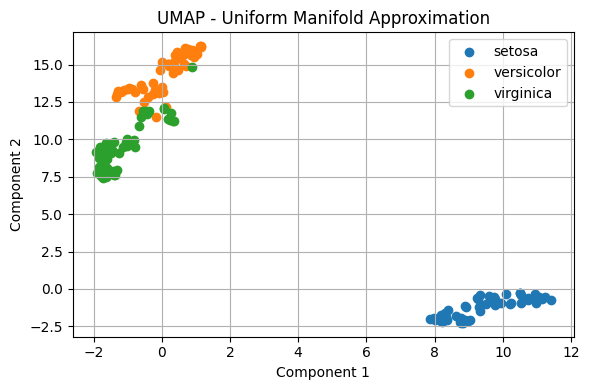

In [66]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
 
# ---- PCA (Linear) ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
 
# ---- t-SNE (Non-linear) ----
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)
 
# ---- UMAP (Manifold Learning) ----
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)
 
# ---- Plot Function ----
def plot_embedding(X_embed, title):
    plt.figure(figsize=(6, 4))
    for i, label in enumerate(target_names):
        plt.scatter(X_embed[y == i, 0], X_embed[y == i, 1], label=label)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
# Plot all techniques
plot_embedding(X_pca, "PCA - Linear Projection")
plot_embedding(X_tsne, "t-SNE - Nonlinear Embedding")
plot_embedding(X_umap, "UMAP - Uniform Manifold Approximation")

## t-SNE visualization tool
- Transforms 4D data into 2D using t-SNE

- Reveals natural clusters and class separations

- Provides interpretable visual feedback on data structure

In [67]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import pandas as pd

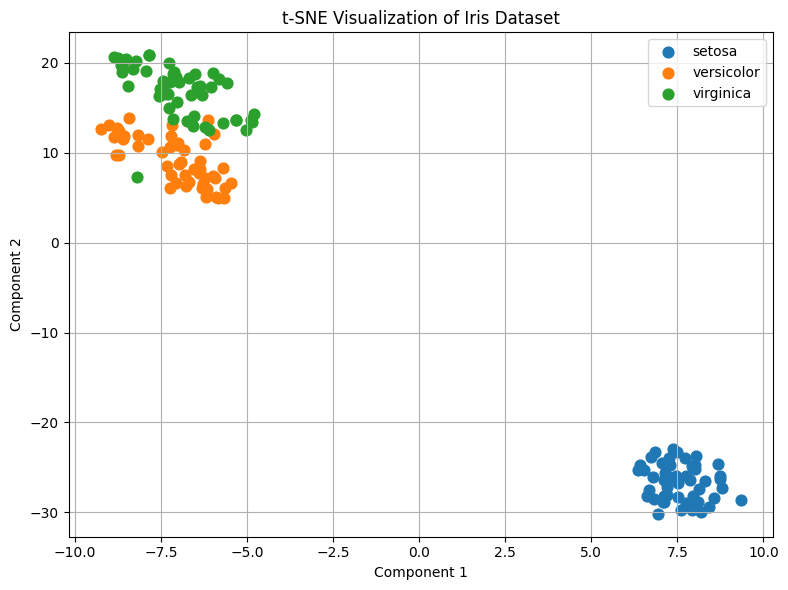

In [69]:
# Assistant
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
 
# Apply t-SNE for dimensionality reduction to 2D
# Changed n_iter to max_iter as per scikit-learn's TSNE implementation
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)
 
# Create a DataFrame for easy plotting
df_tsne = pd.DataFrame(X_tsne, columns=["Component 1", "Component 2"])
df_tsne['Target'] = y
 
# Plot t-SNE result
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    subset = df_tsne[df_tsne['Target'] == i]
    plt.scatter(subset["Component 1"], subset["Component 2"], label=label, s=60)
 
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##  Multi-layer perceptron classifier
- Builds a fully connected neural network for multi-class classification

- Trains and validates an MLP using backpropagation

- Visualizes the accuracy curve to monitor performance

In [70]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

Test Accuracy: 0.98


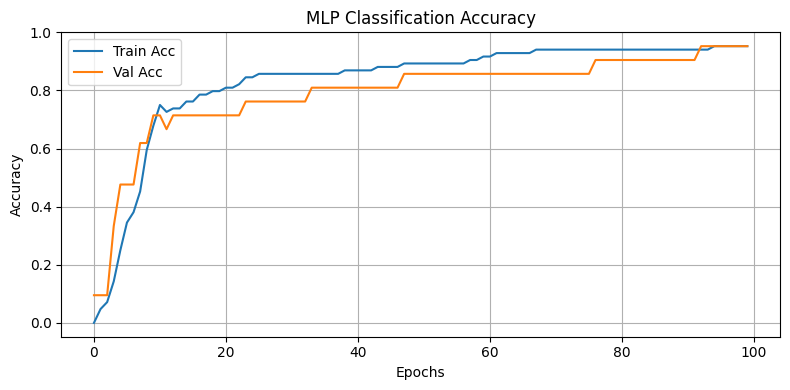

In [71]:
 
# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# One-hot encode target labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)
 
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
 
# ---- Build MLP model ----
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # First hidden layer
    Dense(8, activation='relu'),                     # Second hidden layer
    Dense(3, activation='softmax')                   # Output layer for 3 classes
])
 
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.2)
 
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
 
# ---- Plot training history ----
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('MLP Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()